## Demo for learning dual channel PSF from SMLM data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [2]:
L = psflearninglib()
L.param = io.param.combine(basefile='config_base',psftype='insitu',channeltype='2ch',sysfile='M2')

##### Edit user defined parameters

In [3]:
L.param.datapath = r'E:\EMBL files\data for PSF learning\190910_u2os_course_96_WGA_3D_M2\01_191009_u2os_course_96_WGA_3D_ritu_1/'
L.param.savename = L.param.datapath + 'psfmodel_iter'
L.param.keyword = 'Pos0.' # keyword of the file name or the full file name without extension
L.param.gain = 0.1
L.param.ccd_offset = 400
L.param.option.insitu.stage_pos = 0.5 # micron, stage position relative to infocus at the coverslip
L.param.ref_channel = 1 # choose the brighter channel as the reference channel, 0 or 1
L.param.roi.peak_height = 0.2 # relative to maximum bead intensity, bead intensity below which are rejected
#L.param.option.insitu.min_photon: 0.3
L.param.batch_size = 1000 # lower this number if out of memory

Optional parameters, change cell type to $\small\color{#318CE7}{\mathrm{Python}}$ to activate the cell  
Parameter | Options | Default
--- | --- | ---
$\small\color{skyblue}{\mathrm{PSFtype}}$   | `'insitu_zernike', 'insitu_pupil'` | `'insitu_zernike'`
$\small\color{skyblue}{\mathrm{const\_pupilmag}}$ | `True`, `False` | `False`
$\small\color{skyblue}{\mathrm{mirrortype}}$   | `'up-down', 'left-right'` | `'up-down'`
$\small\color{skyblue}{\mathrm{channel\_arrange}}$   | `'up-down', 'left-right'` | `'up-down'`

$\small\color{skyblue}{\mathrm{init\_pupil\_file}}$ :  Full path to the .h5 file from bead PSF learning, Make sure the bead PSF varies in the correct axial direction, this usually requires setting the parameter $\small\color{skyblue}{\mathrm{stage\_mov\_dir}}$ to `'reverse'` during bead PSF learning

##### Start learning

In [4]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
resfile = L.iterlearn_psf(dataobj,time=0)

E:\EMBL files\data for PSF learning\190910_u2os_course_96_WGA_3D_M2\01_191009_u2os_course_96_WGA_3D_ritu_1\01_191009_u2os_course_96_WGA_3D_ritu_1_MMStack_Pos0.ome.tif
(2, 2000, 234, 256)
rois shape channel 0: (16094, 21, 21)
rois shape channel 1: (8603, 21, 21)
rois shape channel 0: (5122, 21, 21)
rois shape channel 1: (5122, 21, 21)


4/6: calculating spline coefficients: 1/1 [00:01s]  1.53s/it total time: 1.52s
5/6: localization: 4/4 [00:00s] 12.76it/s total time: 1.83s
3/6: learning: 52/100 [00:25s]  2.00it/s, current loss: 1.22773, total time: 25.98s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.52s/it total time: 27.49s
5/6: localization: 4/4 [00:00s] 14.84it/s total time: 27.76s
3/6: learning: 52/100 [00:25s]  2.02it/s, current loss: 0.80862, total time: 51.69s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.49s/it total time: 2.96s
5/6: localization: 4/4 [01:09s] 17.32s/it total time: 72.23s
c:\Users\Sheng\Documents\git\python\PSFLearning\demo\..\psflearning\learning\psfs\PSFMultiChannel_smlm_file.py:108: ComplexWarning: Casting complex values to real discards the imaginary part
  zp = locres[-1]['z'].flatten()+np.float32(self.sub_psfs[0].Zoffset.flatten())
3/6: learning: 151/250 [01:04s]  2.36it/s, current loss: 1.98680, total time: 115.72s


outlier percentage: 0.24581497797356833
rois shape channel 0: (856, 21, 21)
rois shape channel 1: (856, 21, 21)


3/6: learning: 155/250 [00:36s]  4.20it/s, current loss: 1.95862, total time: 152.64s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.49s/it total time: 2.97s
5/6: localization: 4/4 [00:02s]  1.52it/s total time: 5.61s
6/6: saving results: [00:03s] total time: 8.92s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.49s/it total time: 1.48s
5/6: localization: 4/4 [00:00s]  6.73it/s total time: 2.08s
3/6: learning: 52/100 [00:41s]  1.26it/s, current loss: 1.22760, total time: 41.20s
4/6: calculating spline coefficients: 1/1 [00:01s]  1.50s/it total time: 42.69s
5/6: localization: 4/4 [00:00s] 15.88it/s total time: 42.94s
3/6: learning: 55/100 [00:37s]  1.45it/s, current loss: 0.80857, total time: 79.16s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.50s/it total time: 2.97s
5/6: localization: 4/4 [01:04s] 16.16s/it total time: 67.62s
3/6: learning: 222/250 [01:31s]  2.43it/s, current loss: 1.98620, total time: 170.64s


outlier percentage: 0.24783362218370886
rois shape channel 0: (868, 21, 21)
rois shape channel 1: (868, 21, 21)


3/6: learning: 158/250 [00:34s]  4.57it/s, current loss: 1.95782, total time: 205.20s
4/6: calculating spline coefficients: 2/2 [00:02s]  1.47s/it total time: 2.94s
5/6: localization: 4/4 [00:02s]  1.52it/s total time: 5.56s
6/6: saving results: [00:03s] total time: 8.80s


##### Show results

In [5]:
f,p = io.h5.load(resfile) # load result file

channel 0


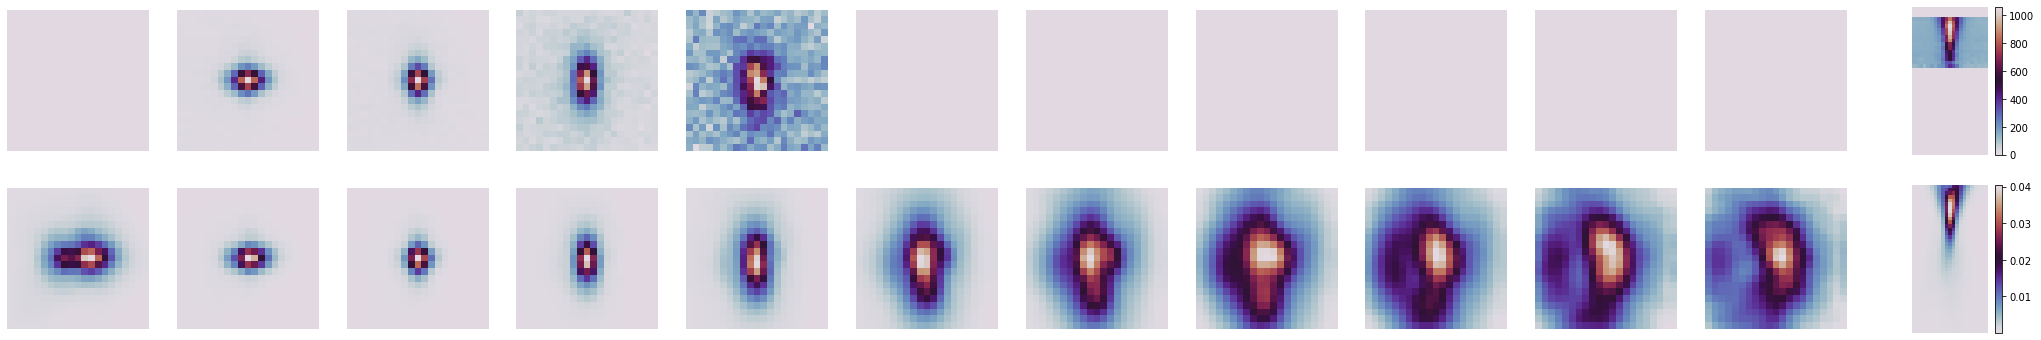

channel 1


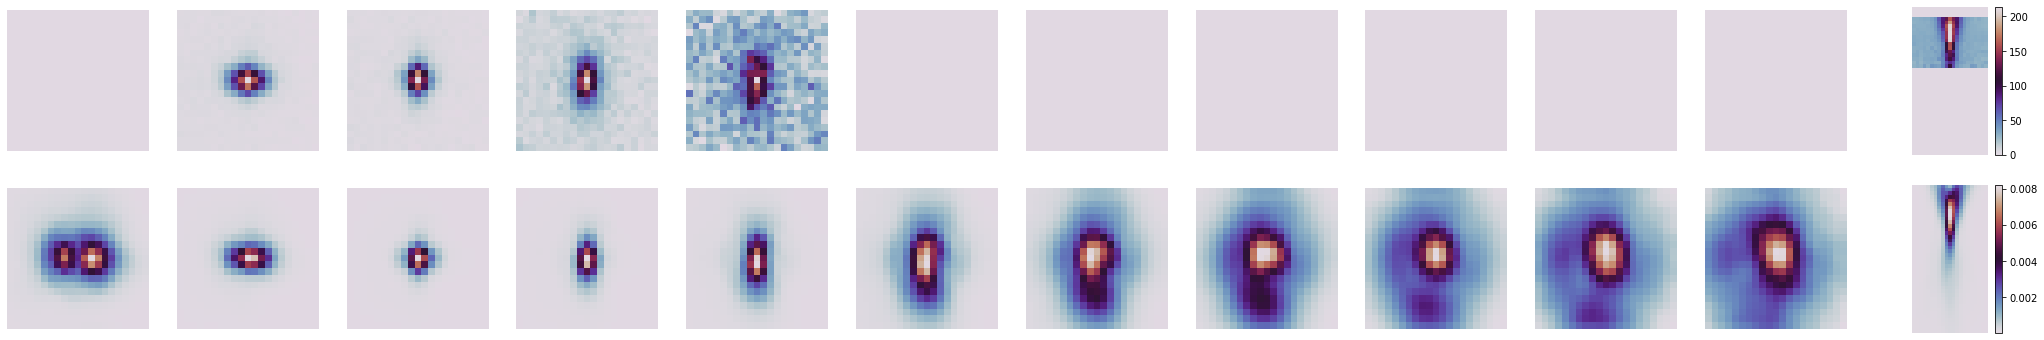

In [6]:
showpsfvsdata_insitu(f,p)

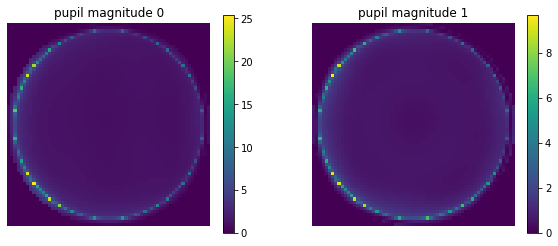

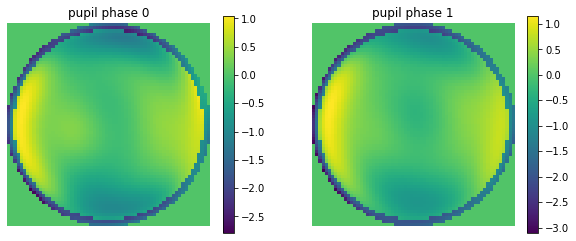

In [7]:
showpupil(f,p)

##### Optional plots

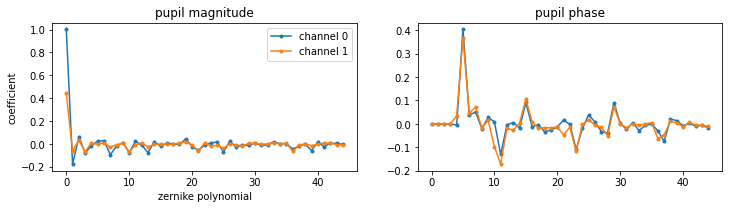

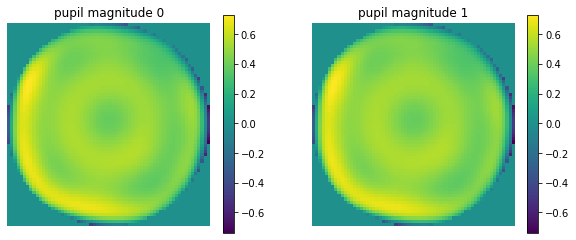

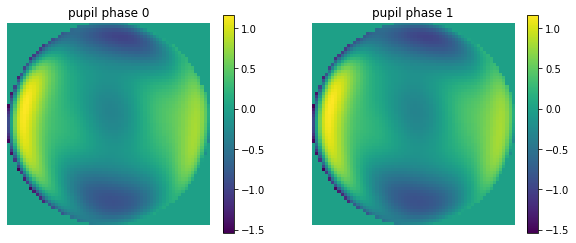

In [8]:
try:
    showzernike(f,p)
except:
    print('no Zernike coefficients')

[[ 0.9988 -0.0502 -0.    ]
 [ 0.0503  0.9976  0.    ]
 [-2.6406  4.061   1.    ]]


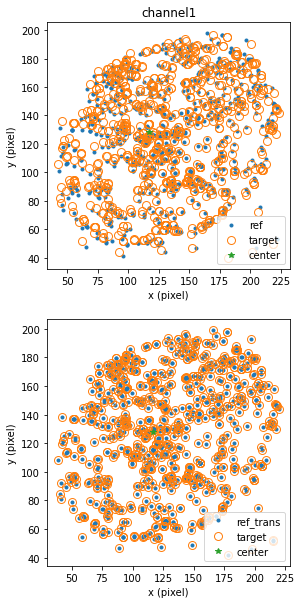

In [9]:
showtransform(f)
np.set_printoptions(precision=4,suppress=True)
print(f.res.T)

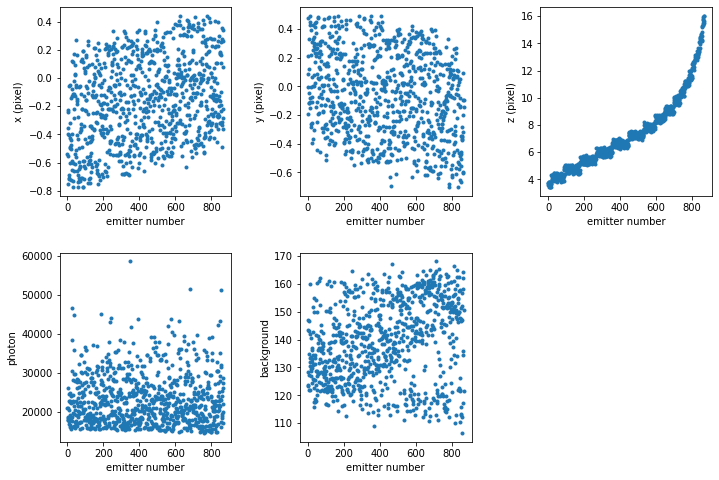

In [10]:
showlearnedparam_insitu(f,p)

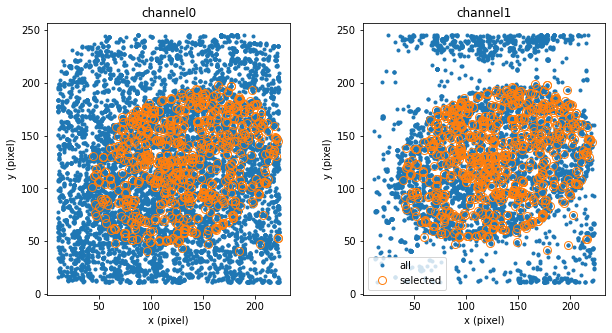

In [11]:
showcoord(f,p)